In [45]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from sklearn.datasets        import load_breast_cancer
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

In [34]:
raw_data = load_breast_cancer()
# type(raw_data)
raw_data.keys()
# raw_data.data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [35]:
# 학습, 테스트

X_train, X_test, y_train, y_test = train_test_split (raw_data.data, raw_data.target,
                                                     test_size = 0.25,
                                                     random_state = 100)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [37]:
X_train[0]

array([1.263e+01, 2.076e+01, 8.215e+01, 4.804e+02, 9.933e-02, 1.209e-01,
       1.065e-01, 6.021e-02, 1.735e-01, 7.070e-02, 3.424e-01, 1.803e+00,
       2.711e+00, 2.048e+01, 1.291e-02, 4.042e-02, 5.101e-02, 2.295e-02,
       2.144e-02, 5.891e-03, 1.333e+01, 2.547e+01, 8.900e+01, 5.274e+02,
       1.287e-01, 2.250e-01, 2.216e-01, 1.105e-01, 2.226e-01, 8.486e-02])

In [38]:
# 모델 만들기 activation = 'sigmoid'
# output dens 1 
# 모델컴파인 optimizer / 정확도, loss = 'binary_crossentropy', 
# 모델 서머리
# 모델 학습
# 모델 평가

In [39]:
model = Sequential ()

model.add (Dense(100, input_shape=(30,)))
model.add (Activation('sigmoid'))

model.add (Dense(50, activation='sigmoid'))
model.add (Dense(25, activation='sigmoid'))
model.add (Dense(10, activation='sigmoid'))

model.add (Dense(1, activation='sigmoid'))

In [40]:
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(learning_rate=0.01),
              metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               3100      
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_27 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 9,696
Trainable params: 9,696
Non-trainable params: 0
____________________________________________________

In [42]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.6572 - accuracy: 0.6370 - val_loss: 0.6697 - val_accuracy: 0.6084
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6611 - accuracy: 0.6274 - val_loss: 0.6696 - val_accuracy: 0.6084
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6644 - accuracy: 0.6196 - val_loss: 0.6695 - val_accuracy: 0.6084
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6568 - accuracy: 0.6357 - val_loss: 0.6696 - val_accuracy: 0.6084
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6545 - accuracy: 0.6403 - val_loss: 0.6695 - val_accuracy: 0.6084
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6677 - accuracy: 0.6122 - val_loss: 0.6697 - val_accuracy: 0.6084
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6552 - accuracy: 0.6379 - val_loss: 0.6697 - val_accuracy: 0.6084
Epoch 8/100
5/5 [===

5/5 [==============================] - 0s 13ms/step - loss: 0.6492 - accuracy: 0.6470 - val_loss: 0.6701 - val_accuracy: 0.6084
Epoch 60/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6659 - accuracy: 0.6161 - val_loss: 0.6702 - val_accuracy: 0.6084
Epoch 61/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6463 - accuracy: 0.6521 - val_loss: 0.6702 - val_accuracy: 0.6084
Epoch 62/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6512 - accuracy: 0.6431 - val_loss: 0.6702 - val_accuracy: 0.6084
Epoch 63/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6604 - accuracy: 0.6263 - val_loss: 0.6702 - val_accuracy: 0.6084
Epoch 64/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6642 - accuracy: 0.6195 - val_loss: 0.6701 - val_accuracy: 0.6084
Epoch 65/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6601 - accuracy: 0.6268 - val_loss: 0.6699 - val_accuracy: 0.6084
Epoch 66/100
5/5 [========

In [50]:
# 교차 검증으로 테스트
# K-Fold 교차검증

In [79]:
# 모델 생성 (함수)

def get_model() :
  model.add( Dense(30 , input_shape=(30 , )))
  model.add( Activation('sigmoid'))

  model.add( Dense(10 , activation='sigmoid'))
  model.add( Dense(10 , activation='sigmoid'))
  model.add( Dense(10 , activation='sigmoid'))

  model.add( Dense(1  , activation='sigmoid'))  
  return model 

fold = KFold(n_splits = 6 )

acc_list = []
for train_idx , val_idx in fold.split(X_train) :
  
  x_train_fold , x_val_fold = X_train[train_idx] , X_train[val_idx]
  y_train_fold , y_val_fold = y_train[train_idx] , y_train[val_idx] 
  
  model = get_model()
  model.fit(x_train_fold , y_train_fold , epochs = 10 , validation_data = (x_val_fold, y_val_fold))
  

  acc = model.evaluate(X_test , y_test)
  acc_list.append(acc)

print(np.mean(acc_list))


Epoch 1/10
4/4 [==============================] - 0s 27ms/step - loss: 0.0918 - accuracy: 0.9500 - val_loss: 0.0196 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0928 - accuracy: 0.9600 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0829 - accuracy: 0.9700 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0742 - accuracy: 0.9700 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0820 - accuracy: 0.9600 - val_loss: 0.0142 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0927 - accuracy: 0.9700 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0869 - accuracy: 0.9600 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 8/10
4/4 [===========

4/4 [==============================] - 0s 13ms/step - loss: 0.0554 - accuracy: 0.9900 - val_loss: 0.1371 - val_accuracy: 0.9000
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.1275 - val_accuracy: 0.9500
Epoch 8/10
4/4 [==============================] - 0s 13ms/step - loss: 0.0544 - accuracy: 0.9800 - val_loss: 0.1689 - val_accuracy: 0.9000
Epoch 9/10
4/4 [==============================] - 0s 14ms/step - loss: 0.0594 - accuracy: 0.9800 - val_loss: 0.1503 - val_accuracy: 0.9000
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0512 - accuracy: 1.0000
0.5262819246078531


In [48]:
fold = KFold(n_splits = 6)


In [49]:
for train_idx, val_idx in fold.split(X_train) :
    print(train_idx, val_idx)

[ 71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 31

In [52]:
# sns.load_dataset('iris')
# labelEncoder
# train_test_split
# model (activation = relu, output activation = softmax )

# optimizer = Adam, loss = categorycal_crossentropy, acc

# complie

# history = fit

# 시각화 loss, val_loss, acc, val_acc 시각화


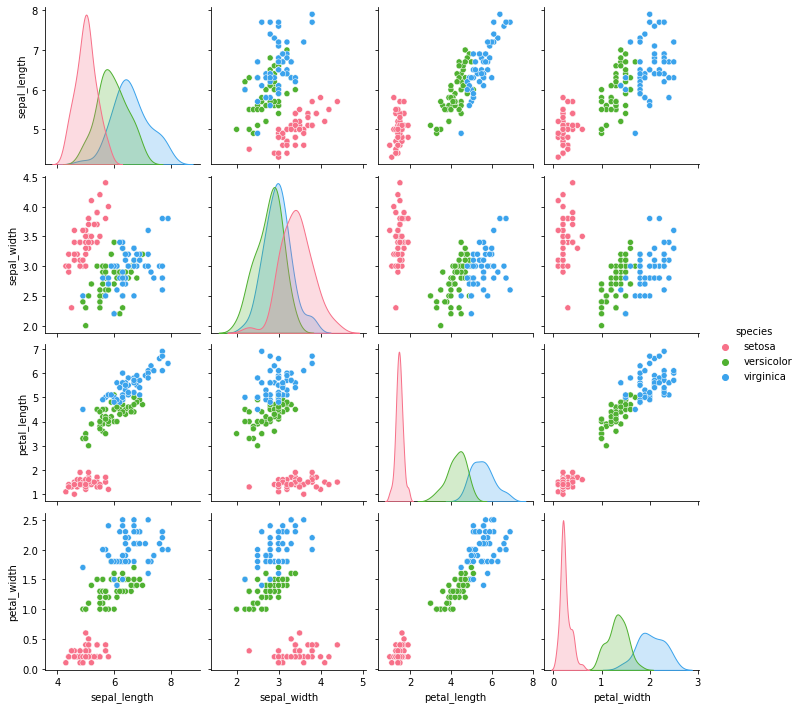

In [53]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", palette="husl")


In [63]:
# type(iris)
# iris.head()
iris['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
encoder_y = encoder.fit_transform(y)
Y = pd.get_dummies(encoder_y).values
Y


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, y_train.shape, X_test.shape,  y_test.shape


((120, 4), (120, 3), (30, 4), (30, 3))

In [73]:
model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_70 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_71 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

Epoch 1/100
4/4 [==============================] - 1s 65ms/step - loss: 1.2660 - accuracy: 0.2377 - val_loss: 1.0046 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 1.0265 - accuracy: 0.4969 - val_loss: 0.9894 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9064 - accuracy: 0.7235 - val_loss: 0.9918 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8478 - accuracy: 0.7319 - val_loss: 0.9429 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8587 - accuracy: 0.6579 - val_loss: 0.8498 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.7964 - accuracy: 0.6694 - val_loss: 0.7909 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.7602 - accuracy: 0.6898 - val_loss: 0.7517 - val_accuracy: 0.6000
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 18ms/step - loss: 0.1325 - accuracy: 0.9658 - val_loss: 0.1573 - val_accuracy: 1.0000
Epoch 60/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1437 - accuracy: 0.9510 - val_loss: 0.1496 - val_accuracy: 1.0000
Epoch 61/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1316 - accuracy: 0.9848 - val_loss: 0.1627 - val_accuracy: 0.9667
Epoch 62/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1401 - accuracy: 0.9650 - val_loss: 0.1502 - val_accuracy: 1.0000
Epoch 63/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1188 - accuracy: 0.9713 - val_loss: 0.1436 - val_accuracy: 1.0000
Epoch 64/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1133 - accuracy: 0.9827 - val_loss: 0.1489 - val_accuracy: 1.0000
Epoch 65/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1036 - accuracy: 0.9838 - val_loss: 0.1397 - val_accuracy: 1.0000
Epoch 66/100
4/4 [========

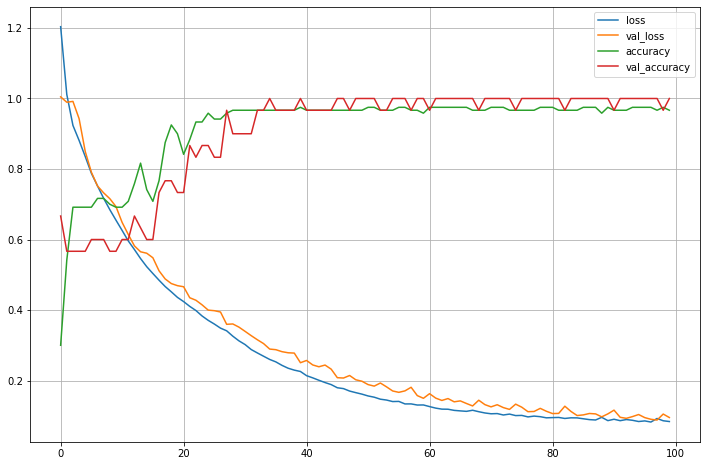

In [75]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()


In [76]:
result = model.evaluate(X_test , y_test) 
print(model.metrics_names)
print('loss' , result[0])
print('acc' , result[1])


1/1 [==============================] - 0s 14ms/step - loss: 0.0951 - accuracy: 1.0000
['loss', 'accuracy']
loss 0.09509006142616272
acc 1.0
